In [ ]:
import os 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import cv2

In [ ]:
!unzip /content/movie1_py.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/movie1_py/tt0032138_faces/shot_0367_img_1.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0284_img_1.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0617_img_2.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0028_img_2.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0322_img_2.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0311_img_2.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0495_img_2.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0173_img_1.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0280_img_0.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0088_img_2.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0381_img_2.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0355_img_0.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_0303_img_1.npy  
  inflating: content/movie1_py/tt0032138_faces/shot_

In [ ]:
files=os.listdir('/content/content/movie1_py/tt0032138_faces')

In [ ]:
%cd /content/content/movie1_py/tt0032138_faces

/content/content/movie1_py/tt0032138_faces


In [ ]:
files.sort()

In [ ]:
similarity_faces=[]
for i in range(0,len(files)-6,6):
  f1=np.load(files[i])
  f2=np.load(files[i+1])
  cos_sim=0
  cos_sim=cosine_similarity([f1],[f2])
  for j in range(i+2,min(i+6,len(files)-1)):
    f1=np.load(files[j])
    f2=np.load(files[j+1])
    #print(cos_sim,i,j)
    cos_sim+=cosine_similarity([f1],[f2])
  similarity_faces.append(cos_sim)


In [ ]:
%cd /content

/content


In [ ]:
!tar -xf /content/tt0032138.tar

In [ ]:
%cd /content/content/movie1_py/tt0032138_faces

/content/content/movie1_py/tt0032138_faces


In [ ]:
files1=os.listdir('/content/tt0032138')

In [ ]:
files1.sort()

In [ ]:
%cd /content/content/movie1_py/tt0032138_places

/content/content/movie1_py/tt0032138_places


In [ ]:
similarity_places=[]
for i in range(0,len(files)-6,6):
  f1=np.load(files[i])
  f2=np.load(files[i+1])
  cos_sim=0
  cos_sim=cosine_similarity([f1],[f2])
  for j in range(i+2,min(i+6,len(files)-1)):
    f1=np.load(files[j])
    f2=np.load(files[j+1])
    #print(cos_sim,i,j)
    cos_sim+=cosine_similarity([f1],[f2])
  similarity_places.append(cos_sim)


In [ ]:
%cd /content/content/movie1_py/tt0032138_person

/content/content/movie1_py/tt0032138_person


In [ ]:
similarity_person=[]
for i in range(0,len(files)-6,6):
  f1=np.load(files[i])
  f2=np.load(files[i+1])
  cos_sim=0
  cos_sim=cosine_similarity([f1],[f2])
  for j in range(i+2,min(i+6,len(files)-1)):
    f1=np.load(files[j])
    f2=np.load(files[j+1])
    #print(cos_sim,i,j)
    cos_sim+=cosine_similarity([f1],[f2])
  similarity_person.append(cos_sim)


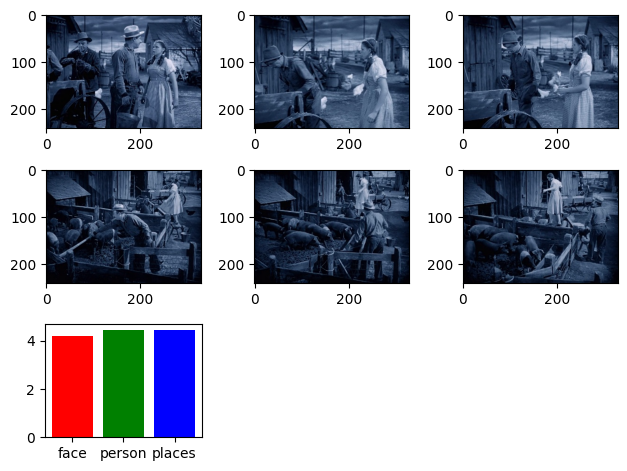

In [ ]:
f, ax = plt.subplots(3,3)
c=30
for i in range(2):
  for j in range(3):
    #print(files1[c])
    im=cv2.imread('/content/tt0032138/'+files1[c])
    #print(im)
    ax[i,j].imshow(im)
    c+=1
feat=['face','person','places']
sim=[similarity_faces[5][0][0],similarity_person[5][0][0],similarity_places[5][0][0]]
ax[2,0].bar(feat,sim,color=['red','green','blue'])
f.delaxes(ax[2][2])
f.delaxes(ax[2][1])
f.tight_layout()
plt.show()